# Titanic: Machine Learning from Disaster - (from Kaggle)

In [1]:
#1. Importing Data Analysis Modules

import pandas as pd

import numpy as np

from pandas import Series, DataFrame

In [2]:
#2 Importing and viewing the data (.csv file)

titanic_df = pd.read_csv('train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#3 Understanding Dataset 

In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 4 Importing Data Visualization Modules

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

Analysis:

1. Understand the passangers
2. Grasp the passanger distributions on Titanic by ticket class
3. Origin of passangers
4. Passangers with relatives on board
5. Probable factors that helped survive the sinking of the Titanic
6. Did the deck have an effect on the passengers survival rate?
7. Did having a family member increase the odds of surviving the crash?


# 1. Understand the passangers

Gender distribution

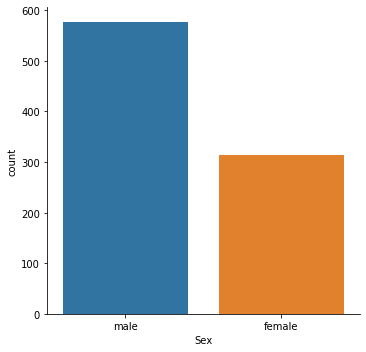

In [9]:
sns.catplot(data = titanic_df, x = 'Sex', kind = 'count')

# Male population was more than the Female population 

Passanger Demographics

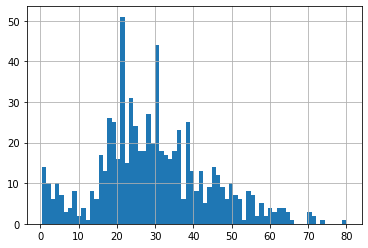

In [12]:
titanic_df['Age'].hist(bins = 70)

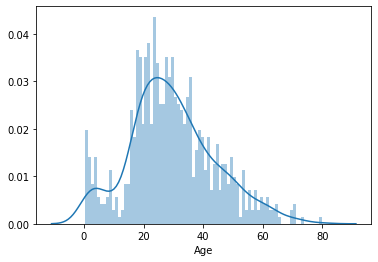

In [40]:
sns.distplot(titanic_df['Age'], bins = 80, rug = False)

# Mean age of all the passangers was approx. 30 years

Seperating passangers under the age of 16 as a child and identifying their gender

In [42]:
def m_f_c(Passanger):
    Age,Sex = Passanger
    
    if Age < 16:
        return 'child'
    
    else:
        return Sex

titanic_df['Person'] = titanic_df[['Age','Sex']].apply(m_f_c, axis = 1)

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,No
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,No
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,No
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,Yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,Yes


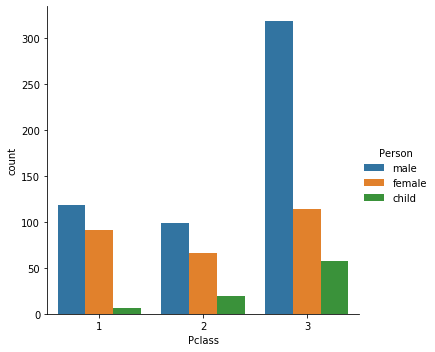

In [43]:
sns.catplot(data = titanic_df, x = 'Pclass', kind = 'count', hue = 'Person')

Using KDE plots for visualizing Gender Distribution

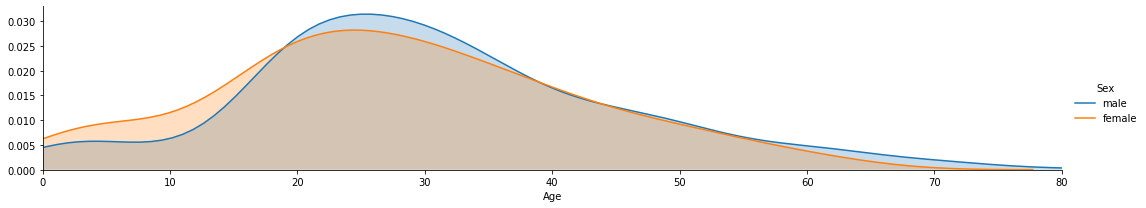

In [45]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 5)

fig.map(sns.kdeplot,'Age',shade = 'True')

oldest = titanic_df['Age'].max()

fig.set(xlim = (0, oldest))

fig.add_legend()


Using KDE plots for visualizing Age and Gender Distribution

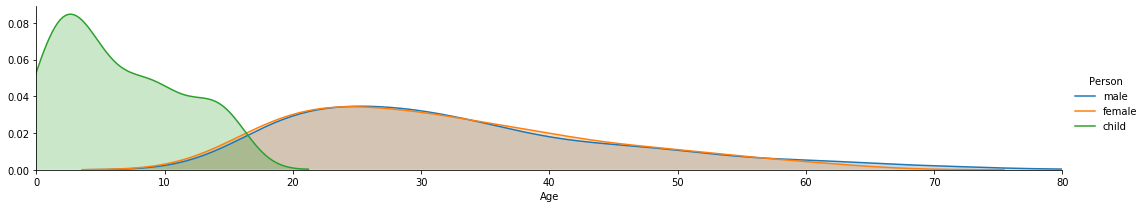

In [47]:
fig = sns.FacetGrid(titanic_df, hue = 'Person', aspect = 5)

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

In [48]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

# 2. Grasp the passanger distributions on Titanic by ticket class

In [49]:
titanic_df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [50]:
deck = titanic_df['Cabin'].dropna()

In [51]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

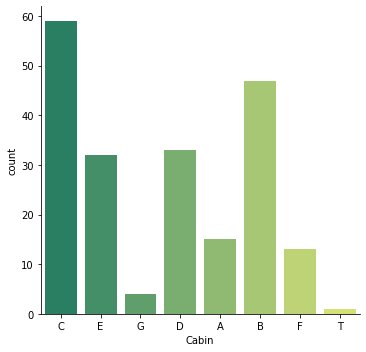

In [52]:
levels = []
for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.catplot(x = 'Cabin', kind = 'count', palette = 'summer', data = cabin_df)

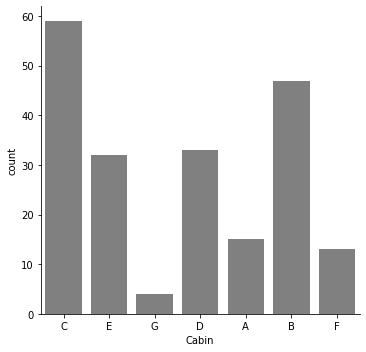

In [53]:
# removing the Class T from the data set

cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.catplot(data = cabin_df, x = 'Cabin', kind = 'count', color = 'grey')

# Most of the passangers belonged to C and B class and G class had the least passangers

# 3. Origin of passangers

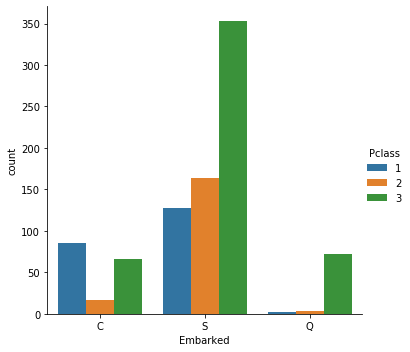

In [54]:
sns.catplot(data = titanic_df, x = 'Embarked', order = ['C', 'S', 'Q'], kind = 'count', hue = 'Pclass')

# Most of the passangers boarded the Titanic from Southampton (S), and most of them were 3rd Class 

# 4. Passangers with relatives on board

In [55]:
# revisiting the titanic dataframe

In [56]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,Yes


In [57]:
titanic_df['Alone'] = titanic_df['SibSp']+titanic_df['Parch']

titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [58]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,Yes


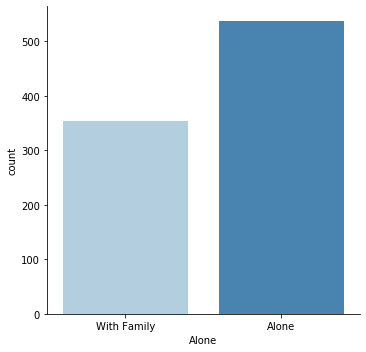

In [59]:
sns.catplot(x = 'Alone', data = titanic_df, palette = 'Blues', kind = 'count')

# There were more number of passangers who were travelling alone

# 5 Probable factors that helped survive the sinking of the Titanic

In [60]:
titanic_df['Survior'] = titanic_df.Survived.map({0: 'No', 1: 'Yes'})

In [87]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survior,Class,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,NaN,0 NaN\n1 C85\n2 NaN\n3 ...
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,C85,0 NaN\n1 C85\n2 NaN\n3 ...
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,NaN,0 NaN\n1 C85\n2 NaN\n3 ...
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,C123,0 NaN\n1 C85\n2 NaN\n3 ...
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No,NaN,0 NaN\n1 C85\n2 NaN\n3 ...


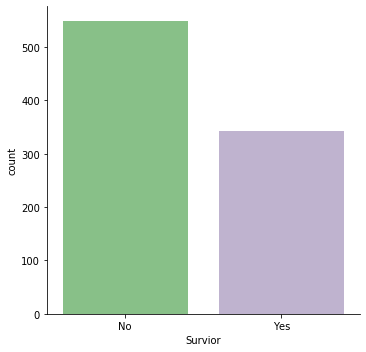

In [62]:
# Surviors

sns.catplot(data = titanic_df, x = 'Survior', kind = 'count', palette = 'Accent')

# Survival rate was lower than mortality rate

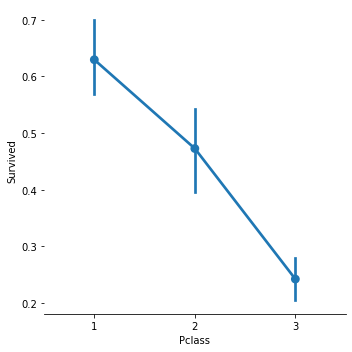

In [63]:
# Survival rate based on Ticket - Class

A = sns.catplot(data = titanic_df, x = 'Pclass', y = 'Survived', kind = 'point')

A.despine(left=True)

# The survival of the passangers in the 2nd and the 3rd classes were lower than the 1st class

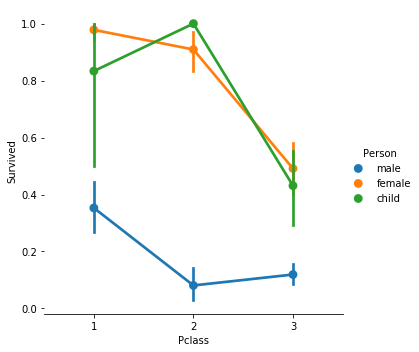

In [69]:
sns.catplot(data = titanic_df, x = 'Pclass', y = 'Survived', kind = 'point',
            hue ='Person').despine(left = True)

#1. Survival rates by ticket class: 
    - 1st. Class - Female > Child > Male 
    - 2nd. Class - Child > Female > Male 
    - 3rd. Class - Female > Child > Male
   
#2. Also:
    Being male or in the lower classes reduced the chances of survival

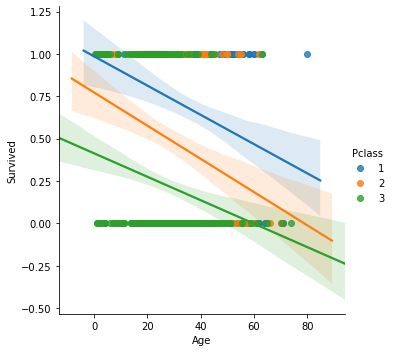

In [65]:
#Drawing linear relationship between Age and Survival rate based on ticket class

sns.lmplot('Age', 'Survived', data = titanic_df, hue = 'Pclass')

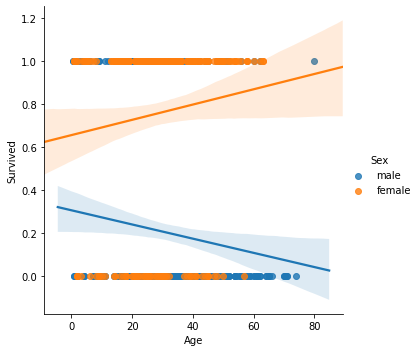

In [71]:
sns.lmplot('Age', 'Survived', data = titanic_df, hue = 'Sex')

# 1. The older female passangers were most likely to survive the sinking

# 2. The older male passangers were less likely to survive the sinking

# 6 Did the deck have an effect on the passengers survival rate?

In [85]:
titanic_df['Class'] = titanic_df['Cabin']

titanic_df['Deck'] = str(titanic_df['Class'])

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survior,Class,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,NaN,0 NaN\n1 C85\n2 NaN\n3 ...
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,C85,0 NaN\n1 C85\n2 NaN\n3 ...
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,NaN,0 NaN\n1 C85\n2 NaN\n3 ...
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,C123,0 NaN\n1 C85\n2 NaN\n3 ...
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No,NaN,0 NaN\n1 C85\n2 NaN\n3 ...


In [76]:
survior_df = DataFrame(titanic_df[['Survived', 'Class','Alone']]).copy().dropna()

survior_df

,Survived,Class,Alone
1,1,C85,With Family
3,1,C123,With Family
6,0,E46,Alone
10,1,G6,With Family
11,1,C103,Alone
...,...,...,...
871,1,D35,With Family
872,0,B51 B53 B55,Alone
879,1,C50,With Family
887,1,B42,Alone


In [77]:
def deck_finder(Class):
    return Class[0][0]

In [84]:
survior_df['Deck'] = survior_df['Class'].apply(deck_finder)

survior_df = survior_df[survior_df.Deck != 'T']

survior_df ['Survived'].loc[survior_df['Survived'] == 'Yes'] = 1
survior_df ['Survived'].loc[survior_df['Survived'] == 'No'] = 0

survior_df

,Survived,Class,Alone,Deck
1,1,C85,With Family,C
3,1,C123,With Family,C
6,0,E46,Alone,E
10,1,G6,With Family,G
11,1,C103,Alone,C
...,...,...,...,...
871,1,D35,With Family,D
872,0,B51 B53 B55,Alone,B
879,1,C50,With Family,C
887,1,B42,Alone,B


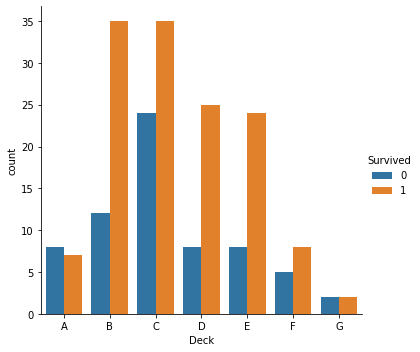

In [86]:
sns.catplot(x= 'Deck', kind = 'count', hue = 'Survived', data = survior_df,
            order = ['A','B','C','D','E','F','G'])

# Being on the B and C decks had the highest chances of survival

# 7. Did having a family member increase the odds of surviving the crash?

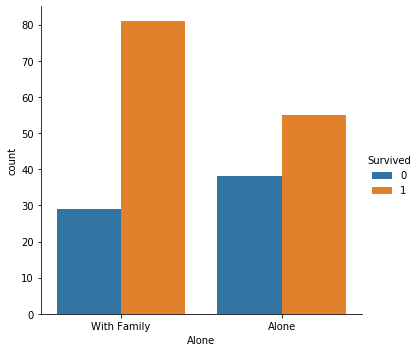

In [83]:
sns.catplot(data = survior_df, x = 'Alone', kind = 'count', hue = 'Survived')

# The survival rate for passangers with family was higher than the passangers traveling alone